<b><font size=5><center>Определение критериев успешности игры в продажах</center></font></b>

### Суть проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков»

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Описание проекта

В ходе работы над проектом я провела предобработку данных - привела названия столбцов к нижнем регистру, поработала над типами данных и пропусками в некоторых столбцах. Также я посчитала суммарные продажи по всем регионам и вывела эти данные в отдельный столбец. Далее я провела исследовательский анализ данных: я проверила, сколько игр выпускалось в разные годы, как менялись продажи, вывела актуальный период для анализа платформ на основании анализа их активности во времени. Я выяснила, какие платформы лидирую по продажам и проследила их динамику и выбрала несколько потенциальных для продажи платформ, посмотрела, как на продажи влияют отзывы пользователей и критиков. Также я выяснила, какие жанры самые прибыльные.
Дальнейшим шагом было более детальное исследование по каждому региону. Я выяснила, какие платформы и жанры лидируют в разных регионах. Проверила, влияет ли рейтинг ESRB на продажи в разных регионах.
Далее я проверила две гипотезы и сделала вывод.

### Извлечение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\mi\Downloads\games.csv")

display(data.head(10))
print(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Предобработка данных

Приведем названия столбцов к нижнему регистру

In [3]:
data.columns = [x.lower() for x in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Разберемся с пропусками.
В столбцах с именем и жанром пропуски заменить на что-то не можем, 2 пропуска проще удалить.
В столбцах с оценкой пользователей, оценкой критиков и рейтингом не стоит заменять пропуски на что-либо - это исказит дальнейший анализ. Поэтому просто заполним их заглушкой 'N/A' - не определен.
В данных с оценкой пользователей встречается значение 'tbd' - подлежит уточнению. Примем это значение за пропуск и обработаем соответственно.
Пропуски в этих столбцах появились, вероятно, из-за давности выхода игр - во время их выхода, скорее всего, еще не было рейтинга и подсчета оценок.

In [4]:
data.dropna(subset=['name', 'genre'], inplace=True) 

In [5]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype(float)

In [6]:
data['user_score'].fillna(float('nan'), inplace=True)
data['critic_score'].fillna(float('nan'), inplace=True)
data['rating'].fillna(float('nan'), inplace=True)

Т.к. пропусков в столбце c годом выпуска меньше 2%, просто удалим их. Сразу же приведем тип данных в столбце к целочисленному для удобства

In [7]:
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int')

Теперь проверим результат обработки

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB
None


Добавим столбец с суммарными продажами во всех регионах. Данные в этих столбцах измеряются в миллионах проданных копий

In [9]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

AxesSubplot(0.125,0.125;0.775x0.755)


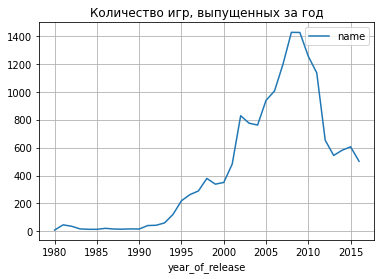

In [10]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
print(games_per_year.plot(title='Количество игр, выпущенных за год', grid=True))

На графике видно, что резкий скачок произошел в 2000 году. Пик количества игр наблюдается в 2008-2009 годах. После этого идет резкий спад. На мой взгляд, данные об играх, выпущенных до 2000 года можно отбросить - их очень мало и на момент анализа эти игры можно считать устаревшими

Теперь рассмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
На основании полученных данных сформируем актуальный период для проведения дальнейшего анализа.

AxesSubplot(0.125,0.125;0.775x0.755)


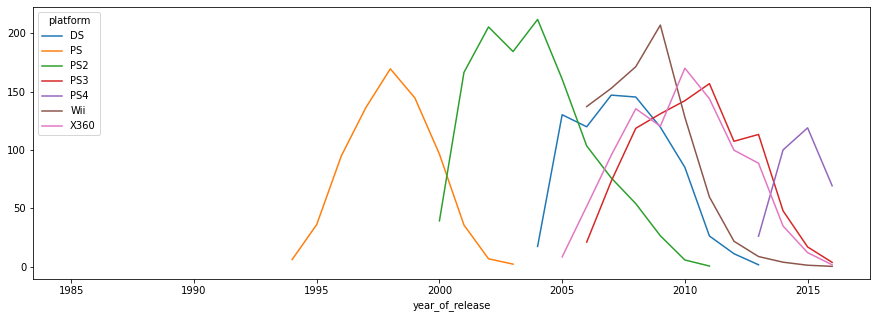

In [11]:
top_platforms = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(7).reset_index()
list_of_top_platforms = list(top_platforms['platform'])
print(data.query('platform == @list_of_top_platforms').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,5)))

На графике видно, что платформы в среднем живут - 5-10 лет. Примерно после 5 лет существования продажи идут на спад. Таким образом, для более детального анализа и прогноза на 2017 год можно взять за актуальный период с 2011 по 2016 год.

Посмотрим, какие платформы лидируют по продажам за актуальный период и растут. Выберем несколько потенциально прибыльных платформ.

In [12]:
actual_data = data.query('year_of_release >= 2011') #срез данных за актуальный период

<AxesSubplot:xlabel='year_of_release'>

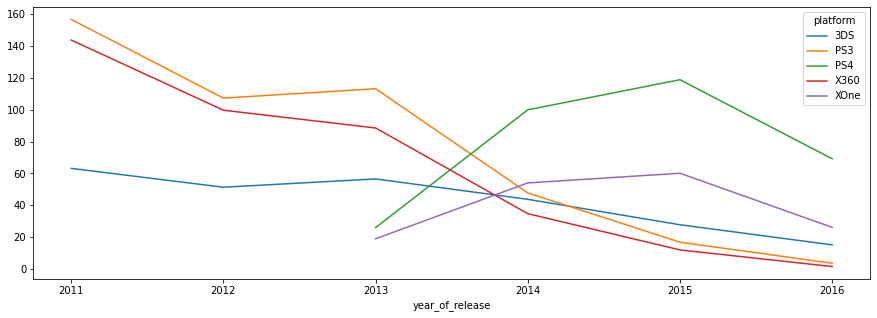

In [13]:
actual_data_top_platform = actual_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head().reset_index()
actual_data_top = actual_data.query('platform in @actual_data_top_platform["platform"]')
actual_data_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,5))

Отобрав топ-5 платформ, лидирующих по продажам за актуальный период и построив распределение продаж по годам, можно выделить 3 платформы, которые потенциально могут принести доход в 2017 году - 3DS, PS4 и XOne. Продажи PS3 и X360 в 2016 году упали почти до 0.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 5.0)

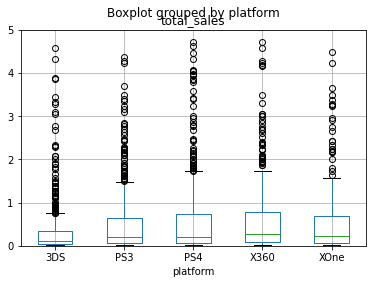

In [14]:
actual_data_top.boxplot('total_sales', by='platform')
plt.ylim(0, 5)

Боксплоты всех платформ примерно одинаковые. Это значит, что разброс продаж за эти 5 лет был примерно одинаковый у всех платформ, за исключением 3DS - у них динамика продаж более- менее равномерная.

Рассмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем к примеру PS3, как платформа с самыми большими продажами. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

              total_sales  user_score  critic_score
total_sales      1.000000   -0.031957      0.406568
user_score      -0.031957    1.000000      0.557654
critic_score     0.406568    0.557654      1.000000


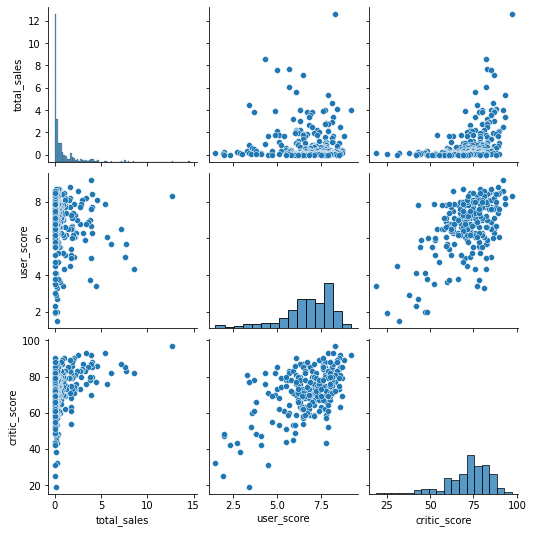

In [15]:
corr_data = actual_data.query('platform == "PS4"')[['total_sales', 'user_score', 'critic_score']]
print(corr_data.corr())
print(sns.pairplot(corr_data))

В результате мы видим, что продажи вообще не зависят от оценки пользователей, тем не менее отмечается небольшая зависимость продаж от оценки критиков

Теперь посмотрим, как это проявляется на всех платформах из топ листа

              total_sales  user_score  critic_score
total_sales      1.000000    0.029343      0.379922
user_score       0.029343    1.000000      0.559918
critic_score     0.379922    0.559918      1.000000


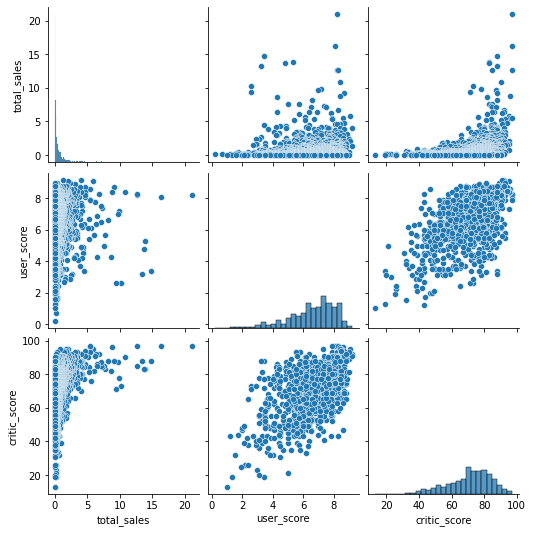

In [16]:
corr_data = actual_data_top[['total_sales', 'user_score', 'critic_score']]
print(corr_data.corr())
print(sns.pairplot(corr_data))

Разницы практически нет. Можно сделать вид, что взаимозависимость продаж и оценок одинакова для всех платформ

Посмотрим на общее распределение игр по жанрам. Построим график с медианным доходов по каждому жанру.

<AxesSubplot:xlabel='genre'>

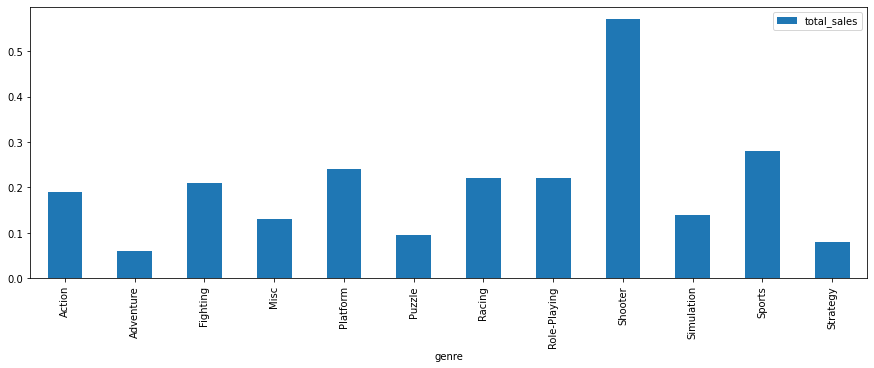

In [17]:
actual_data_top.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(figsize=(15,5), kind='bar')

Сильнее всего по прибыльности выделяются стрелялки. В остальных жанрах доход более-менее одинаковый. Самый минимальный медианный доход наблюдается у приключенческих игр.

### Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

    Самые популярные платформы (топ-5).
    Самые популярные жанры (топ-5).
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,platform,jp_sales
0,3DS,100.62
1,PS3,49.39
2,PSP,24.04
3,PSV,21.84
4,PS4,15.96


[<AxesSubplot:ylabel='jp_sales'>]


,platform,eu_sales
0,PS3,163.10
1,PS4,141.09
2,X360,117.10
3,3DS,61.27
4,PC,56.70


[<AxesSubplot:ylabel='eu_sales'>]


,platform,na_sales
0,X360,226.80
1,PS3,168.26
2,PS4,108.74
3,XOne,93.12
4,3DS,82.65


[<AxesSubplot:ylabel='na_sales'>]


,platform,other_sales
0,PS3,64.82
1,PS4,48.35
2,X360,33.13
3,XOne,14.27
4,3DS,13.27


[<AxesSubplot:ylabel='other_sales'>]


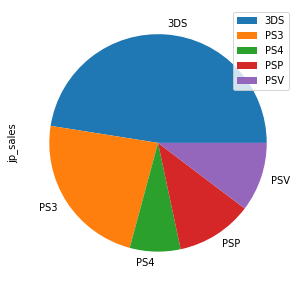

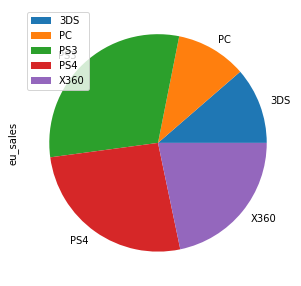

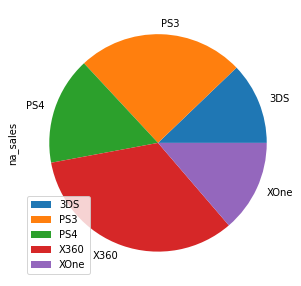

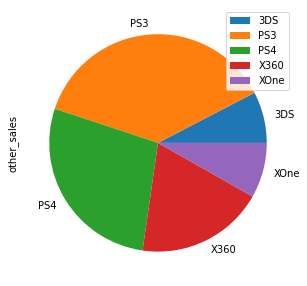

In [18]:
regions = ['jp_sales', 'eu_sales', 'na_sales', 'other_sales'] 
for region in regions: # выявление самых популярных платформ по регионам
    regional_top = actual_data.groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).head().reset_index()
    display(regional_top)
    print(actual_data.query('platform in @regional_top["platform"]').pivot_table(index='platform', values=region, aggfunc='sum').plot(figsize=(15,5), kind='pie', subplots=True))

Популярность платформ в разных регионах значительно варьируется. Например, в Японии сильно популярен 3DS - на него приходится почти половина всех продаж.Остальные платформы в топе Японии - PS разных моделей. В топе не ни одного Xbox.
В то время как в Северной Америке и других странах Xbox и PS примерно одинаково популярны.

,genre,jp_sales
0,Role-Playing,79.87
1,Action,63.62
2,Misc,17.60
3,Fighting,12.38
4,Platform,12.13


[<AxesSubplot:ylabel='jp_sales'>]


,genre,eu_sales
0,Action,199.12
1,Shooter,148.02
2,Sports,88.48
3,Role-Playing,62.30
4,Racing,40.58


[<AxesSubplot:ylabel='eu_sales'>]


,genre,na_sales
0,Action,230.92
1,Shooter,194.43
2,Sports,108.70
3,Role-Playing,83.78
4,Misc,69.69


[<AxesSubplot:ylabel='na_sales'>]


,genre,other_sales
0,Action,64.14
1,Shooter,48.54
2,Sports,28.88
3,Role-Playing,19.68
4,Misc,12.41


[<AxesSubplot:ylabel='other_sales'>]


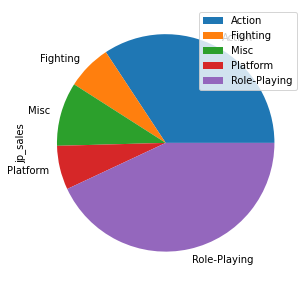

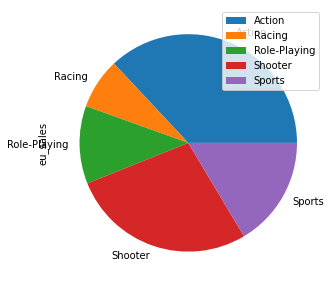

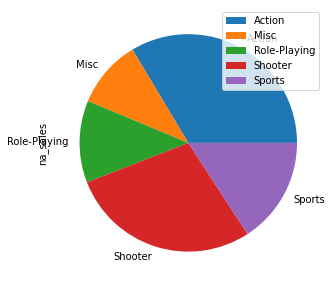

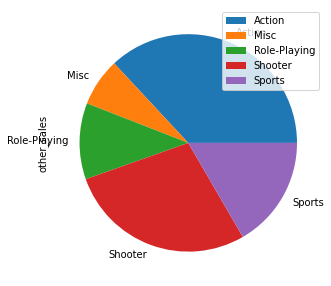

In [19]:
for region in regions: # выявление самых популярных жанров по регионам
    regional_top = actual_data.groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).head().reset_index()
    display(regional_top)
    print(actual_data.query('genre in @regional_top["genre"]').pivot_table(index='genre', values=region, aggfunc='sum').plot(figsize=(15,5), kind='pie', subplots=True))

В топе жанров по популярности в Северной Америке, Европе и других странах расклад почти одинаковы - лидерство и экшен игр и стрелялок, на третьем месте спортивные. Япония в этом вопросе сильно отличается - там почти половина всех продаж приходится на РПГ, на втором месте экшен.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


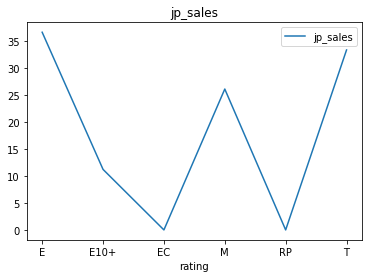

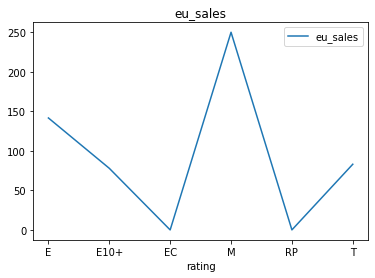

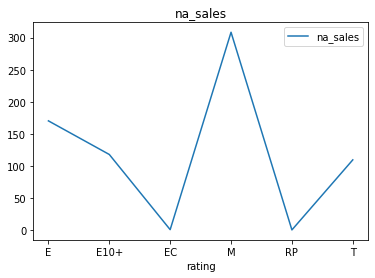

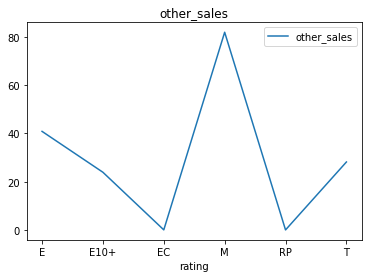

In [20]:
for region in regions:
    print(actual_data.pivot_table(index='rating', values=region, aggfunc='sum').plot(title=region))
    

В оценке влияния рейтинга на продажи опять выделяется Япония. Здесь более популярны игры для подростков и категории "Для всех".
Во всех остальных регионах лидируют игры для взрослых.
Продажи в категориях "Для детей" или "Рейтинг не определен" - практически отсутствуют во всех регионах.

### Проверка гипотез

    Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.
    

In [21]:
actual_data.dropna(subset='user_score', inplace=True)
alpha = .05

results = sp.stats.ttest_ind(
    actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'], 
    actual_data.loc[actual_data['platform'] == 'PC', 'user_score'])
print(actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'].mean())
print(actual_data.loc[actual_data['platform'] == 'PC', 'user_score'].mean())

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.521428571428572
6.451791530944625
p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC действительно почти одинаковые

    Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;
    Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [22]:
alpha = .05

results = sp.stats.ttest_ind(
    actual_data.loc[actual_data['genre'] == 'Action', 'user_score'], 
    actual_data.loc[actual_data['genre'] == 'Sports', 'user_score'])
print(actual_data.loc[actual_data['genre'] == 'Action', 'user_score'].mean())
print(actual_data.loc[actual_data['genre'] == 'Sports', 'user_score'].mean())

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.775903614457831
5.650813008130081
p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports отличаются

Для проверки гипотез я выбрала метод проверки гипотез о равенстве средних двух генеральных совокупностей, т.к. посчитала ее наиболее подходящей для них. Поэтому нулевую гипотезу формулировала на основании проверки равенства

### Вывод

В ходе работы над проектом я провела предобработку данных - привела названия столбцов к нижнем регистру, поработала над типами данных и пропусками в некоторых столбцах. Также я посчитала суммарные продажи по всем регионам и вывела эти данные в отдельный столбец. Далее я провела исследовательский анализ данных: я проверила, сколько игр выпускалось в разные годы, как менялись продажи, вывела актуальный период для анализа платформ на основании анализа их активности во времени. Я выяснила, какие платформы лидирую по продажам и проследила их динамику и выбрала несколько потенциальных для продажи платформ, посмотрела, как на продажи влияют отзывы пользователей и критиков. Также я выяснила, какие жанры самые прибыльные.
Дальнейшим шагом было более детальное исследование по каждому региону. Я выяснила, какие платформы и жанры лидируют в разных регионах. Проверила, влияет ли рейтинг ESRB на продажи в разных регионах.
Далее я проверила две гипотезы и сделала вывод, что при формировании плана продаж на 2017 год нужно обратить особое внимание на:
- регион продаж - например, потребности пользователей в Японии сильно отличаются от других регионов. Самые популярные жанры и платформы там совсем другие;
- возрастной рейтинг - наиболее популярными по всему миру оказались игры 18+. В Японии также популярны игры для подростков и всех возрастов.
- платформу - самыми актуальными и потенциально прибыльными платформами на момент анализа считаются 3DS, PS4 и XOne;
- жанр - самыми популярными жанрами являются экшен, стрелялки, спортивные и РПГ.
